<a href="https://colab.research.google.com/github/valenja9/Pokus_o_git/blob/master/5_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation

Vague definition:
> We want to classifify all image pixels to some distinct classes (often we want to distinguish foreground and background) and we will call this process or algorithms achieving this goal *segmentation*.

We will have two types:
1. Semantic segmentation - categories of objects
2. Instance segmentation - all instances of objects

## Example of  comparison of different operations with image

[image source](https://medium.com/analytics-vidhya/instance-segmentation-using-mask-r-cnn-on-a-custom-dataset-78631845de2a)

![al segmentation](data/lecture/segmentation_all.jpeg)

## Example of semantic segmentation

[source of image](https://medium.com/cogitotech/what-is-the-difference-between-image-segmentation-and-classification-in-image-processing-303d1f660626)

![Semantic segmentation](data/lecture/semantic_segmentation.jpeg)

## Example of instance segmentation

[image source](https://medium.com/@ylashin/quick-and-easy-guide-to-prepare-a-detectron-sandbox-940ccad8ffe2)

![Instance segmentation](data/lecture/instance_segmentation.png)

In [ ]:
# usual imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.spatial import distance
import glob

## Example 1 - Binary classification

In [ ]:
img = cv2.imread("/content/nail_error.jpg")
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib still works in RGB
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

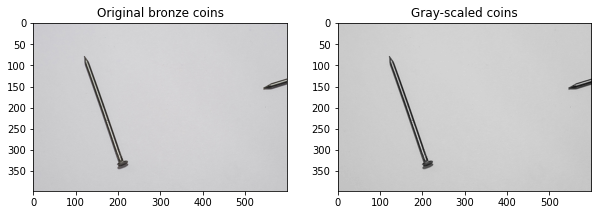

In [ ]:
plt.figure(figsize=(10,8))

ax1 = plt.subplot(121)
ax1.set_title("Original bronze coins")
plt.imshow(img_color)

ax2 = plt.subplot(122)
ax2.set_title("Gray-scaled coins")
plt.imshow(img_gray, cmap="gray")

### Binary thresholding

In [ ]:
THRESHOLDS = [10, 70, 150, 180, 210, 240]
results = []
for t in THRESHOLDS:
    # read the docs if you are interested
    _, thresholded = cv2.threshold(img_gray, t, 255, cv2.THRESH_BINARY) # source, threshold, max value, type
    results.append(thresholded)

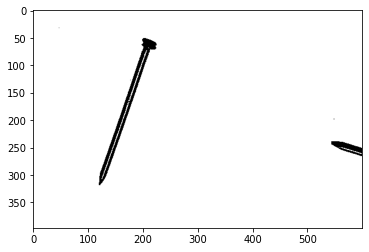

In [ ]:
import cv2
plt.imshow(cv2.flip(results[3],0),cmap="gray")

#Moje reseni 
-Hledam prvni a posledni pixel s contrastem mensim nez 255.
- Mozne vylepseni
  - vycistit obrazek od sumu.
  - pokud se objevi vice mensich hrebiku, bylo by lepsi je odfiltrovat.


In [ ]:
glob.glob('/content/*.jpg')

['/content/nail_error.jpg', '/content/nail_empty.jpg', '/content/nail_04.jpg']

In [ ]:

def tresholding(img_gray):
  THRESHOLDS = [10, 70, 150, 180, 210, 240]
  results = []
  for t in THRESHOLDS:
      _, thresholded = cv2.threshold(img_gray, t, 255, cv2.THRESH_BINARY)
      results.append(thresholded)
  return results


def prepocet(X_first, X_last, vzdalenost_kamery):
  dst = distance.euclidean(X_first, X_last)/10 #Spoctena vzdalenost mezi vektory.  prevedena na cm.
  return dst*dst/vzdalenost_kamery 

def umisteni_hrebiku(tresholded_img):
    #Naplnim list souradnic jednotlivych pixelu mensich nez 255.
    #prvni je zacatek hrebiku a posledni je konec hrebiku.
    x, y = tresholded_img.shape
    list_of_x_and_y = []
    for i in range(x): #pro vsechny radky
      for k, pixel in enumerate(tresholded_img[i]): #pro kazdy pixel v radku.
        if pixel < 255:
          list_of_x_and_y.append((i,k))

    count_of_pixels = len(list_of_x_and_y)
    if count_of_pixels < 100:
      print("Na obrazku neni hrebik!")
      return False, False, False
    else:
      print("Hrebik zmeren")
      #vracim: pritomnost, prvni vyskyt, posledni vyskyt
      return  True ,list_of_x_and_y[0], list_of_x_and_y[-1]







def main():
  for path_to_img in glob.glob('/content/*.jpg'):
    img = cv2.imread(path_to_img)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tresholded_img =  tresholding(img_gray)[3]
    pritomnost ,X_first , X_last= umisteni_hrebiku(tresholded_img)
    if pritomnost == True:
      delka = prepocet(X_first,X_last,vzdalenost_kamery=80)
      plt.imshow(img_gray)
      plt.show()
      print(X_first,X_last)
      print(pritomnost, delka)
    else:
      plt.imshow(img_gray)
      plt.show()
      print("Neni hrebik") 

Hrebik zmeren


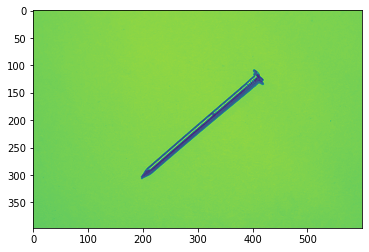

(108, 402) (307, 199)
True 10.101249999999997
Hrebik zmeren


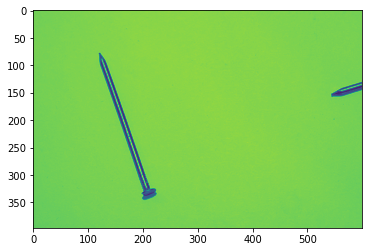

(78, 120) (364, 47)
True 10.890625000000004
Hrebik zmeren


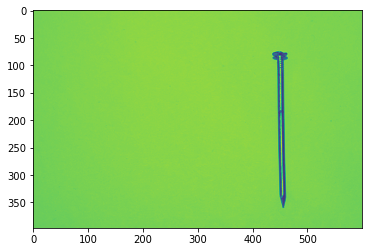

(75, 445) (360, 457)
True 10.171125
Hrebik zmeren


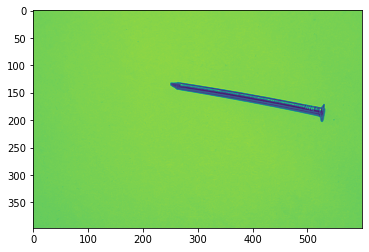

(131, 263) (203, 528)
True 9.426125000000003
Na obrazku neni hrebik!


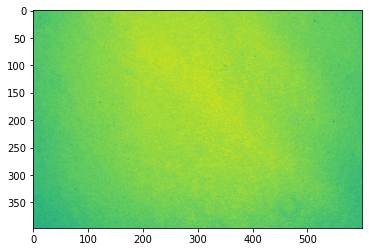

Neni hrebik
Hrebik zmeren


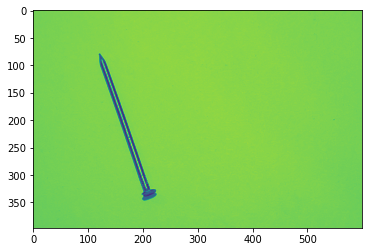

(79, 121) (346, 206)
True 9.81425
Hrebik zmeren


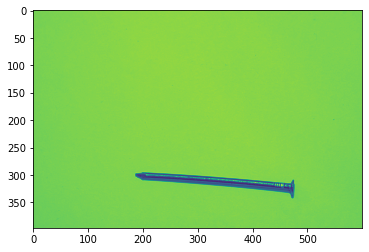

(199, 548) (342, 474)
True 3.240624999999999


In [ ]:
main()

In [ ]:
#Counter cernych pixelu....
#True or False

In [ ]:
from scipy.spatial import distance
a = (79 ,121)
b = (346,206)
dst = distance.euclidean(a, b)/10
print(dst*dst/80,"cm")

9.81425 cm


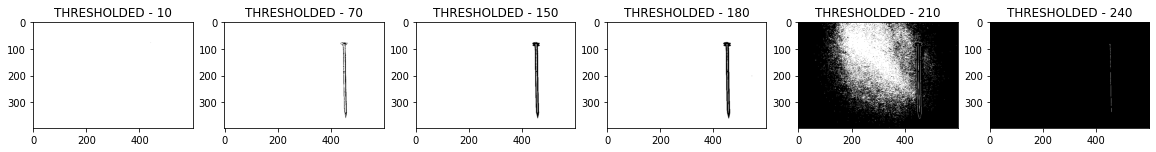

In [ ]:
plt.figure(figsize=(20,8))

for i in range(len(THRESHOLDS)):
    ax = plt.subplot(1, len(THRESHOLDS), i+1)
    ax.set_title("THRESHOLDED - {}".format(THRESHOLDS[i]))
    plt.imshow(results[i], cmap="gray", vmin=0, vmax=255)

### OTSU and triangle thresholding

These algorithms will ignore *threshold* and tries to guess it somehow optimaly.

In [ ]:
ret_otsu, thresholded_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_tri, thresholded_tri = cv2.threshold(img_gray, 155, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)

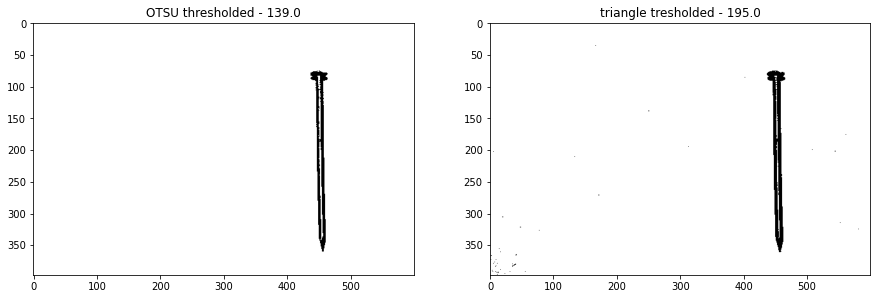

In [ ]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot(121)
ax1.set_title("OTSU thresholded - {}".format(ret_otsu))
plt.imshow(thresholded_otsu, cmap="gray")

ax2 = plt.subplot(122)
ax2.set_title("triangle tresholded - {}".format(ret_tri))
plt.imshow(thresholded_tri, cmap="gray")

## Example 2 - Template matching (Where is the coin?)

In [ ]:
coin_path = os.path.join("data", "coin_twosided.jpg")
coin = cv2.imread("/content/coin_twosided.jpg")
coin_color = cv2.cvtColor(coin, cv2.COLOR_BGR2RGB) #matplotlib still works in RGB
coin_gray = cv2.cvtColor(coin, cv2.COLOR_BGR2GRAY)

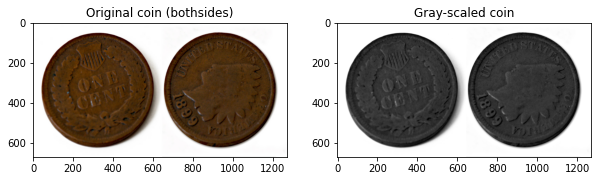

In [ ]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(121)
ax1.set_title("Original coin (bothsides)")
plt.imshow(coin_color)

ax2 = plt.subplot(122)
ax2.set_title("Gray-scaled coin")
plt.imshow(coin_gray, cmap="gray")

In [ ]:
template_path = os.path.join("data", "coin_template.png")
template_color = cv2.imread("/content/coin_template.png")
template_gray = cv2.cvtColor(template_color, cv2.COLOR_BGR2GRAY)

In [ ]:
COIN_SIZE = (560, 560) # coin size in pixels (guess from picture)
template = cv2.resize(template_gray, COIN_SIZE)
template_inverted = 255 - template
w, h = template.shape[::-1]

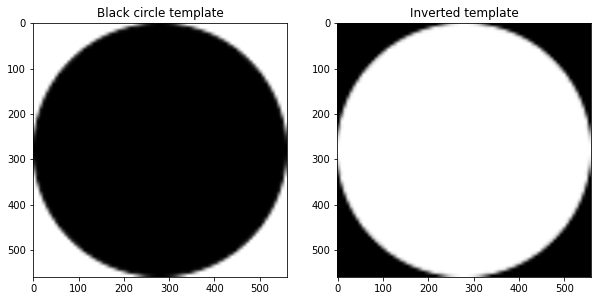

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(121)
ax1.set_title("Black circle template")
plt.imshow(template, cmap="gray")

ax2 = plt.subplot(122)
ax2.set_title("Inverted template")
plt.imshow(template_inverted, cmap="gray")

### Naive approach - 2D correlate our template with grayscaled original

In [ ]:
CORRCOEF_THRESHOLD_NAIVE = 0.7
coins_rgb_naive = np.copy(coin_color)
normed_corrcoef_naive = cv2.matchTemplate(coin_gray, template, cv2.TM_CCORR_NORMED)
loc_naive = np.where(normed_corrcoef_naive >= CORRCOEF_THRESHOLD_NAIVE)
for pt in zip(*loc_naive[::-1]):
    cv2.rectangle(coins_rgb_naive, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

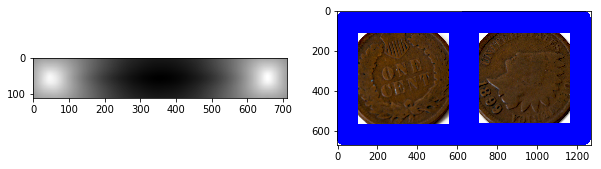

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(normed_corrcoef_naive, cmap="gray")

plt.subplot(122)
plt.imshow(coins_rgb_naive)

## Example 3 - Image and its background-foreground separation by histograms

In [ ]:
zebra_path = os.path.join("data", "zebra.jpg")
zebra = cv2.imread(zebra_path)
zebra_color = cv2.cvtColor(zebra, cv2.COLOR_BGR2RGB)
zebra_gray = cv2.cvtColor(zebra, cv2.COLOR_BGR2GRAY)

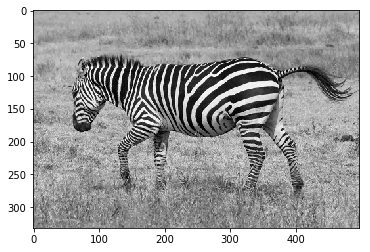

In [ ]:
plt.imshow(zebra_gray, cmap="gray")

In [ ]:
# USER PROVIDED INPUTS
BACKGROUND = [[(20,5),(250,40)], [(100,280),(250,320)]]
FOREGROUND = [[(100,95),(200,125)], [(295,110),(350,175)]]

In [ ]:
# background histogram
background_regions = [zebra_gray[b[0][1]:b[1][1], b[0][0]:b[1][0]] for b in BACKGROUND]
background_joined = np.concatenate([x.flatten() for x in background_regions])
b_count, b_bins = np.histogram(background_joined, bins=256, range=(0.,256.), density=True)
b_x = b_bins[1:] - 0.5 
# foreground histogram
forground_regions = [zebra_gray[f[0][1]:f[1][1], f[0][0]:f[1][0]] for f in FOREGROUND]
foreground_joined = np.concatenate([x.flatten() for x in forground_regions])
f_count, f_bins = np.histogram(foreground_joined, bins=256, range=(0.,256.), density=True)
f_x = f_bins[1:] - 0.5

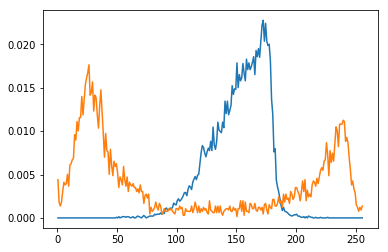

In [ ]:
plt.plot(b_x, b_count)
plt.plot(f_x, f_count)

In [ ]:
mask = f_count > b_count
start_value = np.argmin(f_count > b_count)
end_value = 255 - np.argmin(np.flip(f_count) > np.flip(b_count))

In [ ]:
foreground_mask = (zebra_gray >= start_value)&(zebra_gray <= end_value)

In [ ]:
regions = np.copy(zebra_color)
regions[:,:,0] = ~(foreground_mask) * 255
regions[:,:,1] = 0
regions[:,:,2] = foreground_mask * 255

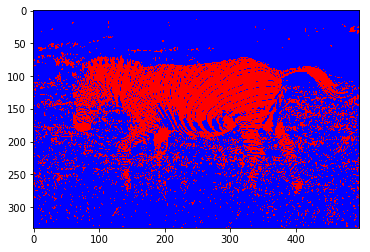

In [ ]:
plt.imshow(regions)

In [ ]:
zebra_regions = np.copy(zebra)
for b in BACKGROUND:
    cv2.rectangle(zebra_regions, b[0], b[1], (0,0,255), 2)
for f in FOREGROUND:
    cv2.rectangle(zebra_regions, f[0], f[1], (255,0,0), 2)

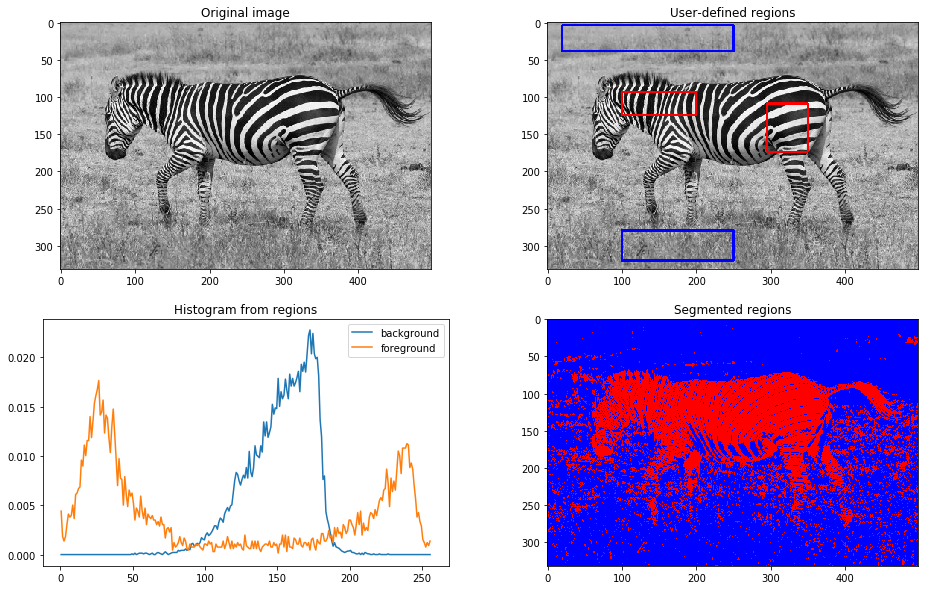

In [ ]:
plt.figure(figsize=(16,10))

ax1 = plt.subplot(221)
ax1.set_title("Original image")
plt.imshow(zebra)

ax2 = plt.subplot(222)
ax2.set_title("User-defined regions")
plt.imshow(zebra_regions)

ax3 = plt.subplot(223)
ax3.set_title("Histogram from regions")
plt.plot(b_x, b_count, label="background")
plt.plot(f_x, f_count, label="foreground")
plt.legend()

ax2 = plt.subplot(224)
ax2.set_title("Segmented regions")
plt.imshow(regions)

[source FEL lecture](https://cw.fel.cvut.cz/wiki/courses/b4m33dzo/labs/4_segmentation)